In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

In [2]:
filepath="C:\\Users\\HP\\Desktop\\labs\\final\\cleaned_data_1.csv"
df=pd.read_csv(filepath)
df.head()

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
0,3,1000,0.03,6.20,6200.0,240.117626,Pediatric,10mg/ml,358
1,15,31920,0.07,3.99,127360.8,240.117626,Adult,150mg,1855
2,16,38000,0.05,3.20,121600.0,240.117626,Adult,30mg,7590
3,23,416,0.02,5.35,2225.6,240.117626,Pediatric,10mg/ml,504
4,44,135,0.36,32.40,4374.0,240.117626,Pediatric,200mg,328


In [3]:
check_cols=['line_item_quantity', 'line_item_value']
x_train=df[check_cols]
x_train.head()

,line_item_quantity,line_item_value
0,1000,6200.0
1,31920,127360.8
2,38000,121600.0
3,416,2225.6
4,135,4374.0


In [4]:
# clf=IsolationForest(n_jobs=6,random_state=23,contamination=0.05)
# clf.fit(x_train)
# y_pred_train = clf.predict(x_train)
# y_pred_train

x_train=x_train.apply(pd.to_numeric,errors='coerce')#it is used to convert all the values into numeric and any null or nan values are there it can be considered as 
x_train=x_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)#the no.of cores used for parallelizatio,random state-sets,contamination=total percentage of data that need to be considered 
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [5]:
pd.value_counts(y_pred_train)

 1    7471
-1     394
Name: count, dtype: int64

In [6]:
x_train.loc[y_pred_train==-1,:]

,line_item_quantity,line_item_value
82,95500,144205.00
85,71577,1087970.40
112,61021,725539.69
169,60784,1018132.00
270,10680,438948.00
...,...,...
7818,110000,908600.00
7827,49270,666130.40
7830,120000,926400.00
7860,205243,738874.80


In [7]:
anomaly_ratio = len(y_pred_train[y_pred_train == -1]) / len(x_train)
print("Anomaly Detection Ratio:", anomaly_ratio)

Anomaly Detection Ratio: 0.05009535918626828


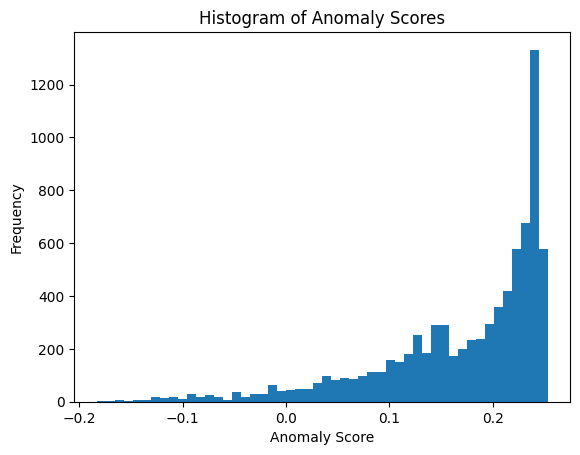

In [8]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(x_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

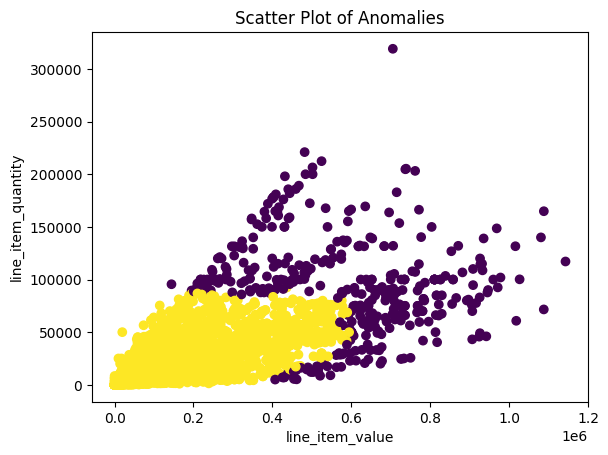

In [ ]:
plt.scatter(x_train['line_item_value'], x_train['line_item_quantity'], c=y_pred_train, cmap='viridis')
plt.title("Scatter Plot of Anomalies")
plt.xlabel("line_item_value")
plt.ylabel("line_item_quantity")
plt.show()

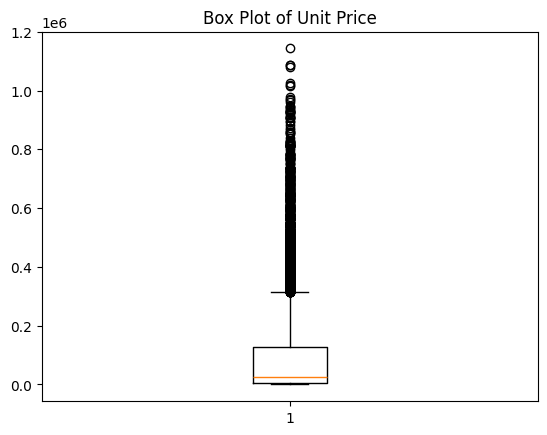

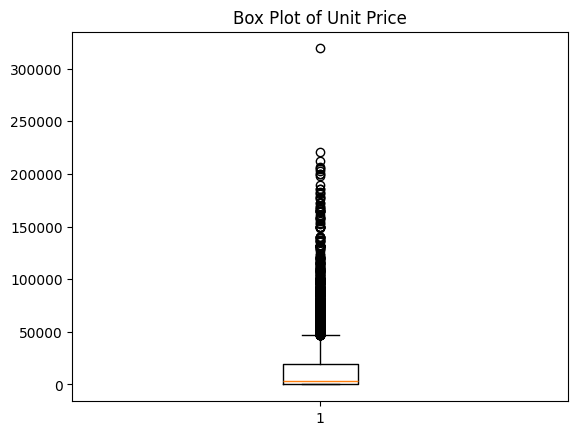

In [ ]:
plt.boxplot(x_train['line_item_value'])
plt.title("Box Plot of Unit Price")
plt.show()

plt.boxplot(x_train['line_item_quantity'])
plt.title("Box Plot of Unit Price")
plt.show()

In [ ]:
anomaly_ratio = len(y_pred_train[y_pred_train == -1]) / len(x_train)
print("Anomaly Detection Ratio:", anomaly_ratio)

Anomaly Detection Ratio: 0.05009535918626828


KeyError: 'unit_price'

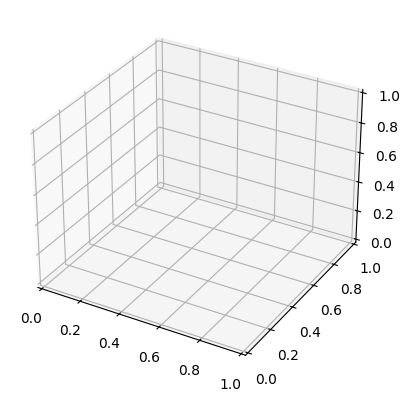

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train['unit_price'], x_train['line_item_quantity'], x_train['line_item_value'], c=y_pred_train, cmap='viridis')
ax.set_xlabel('Unit Price')
ax.set_ylabel('Line Item Quantity')
ax.set_zlabel('Line Item Value')
plt.title("3D Scatter Plot of Anomalies")
plt.show()


In [ ]:
cols=['line_item_quantity']
n_train=df[cols]
n_train.head()

,line_item_quantity
0,1000
1,31920
2,38000
3,416
4,135


In [ ]:
n_train=n_train.apply(pd.to_numeric,errors='coerce')
n_train=n_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(n_train)
m_pred_train=clf.predict(n_train)
m_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.value_counts(m_pred_train)

 1    7477
-1     388
Name: count, dtype: int64

In [ ]:
n_train.loc[m_pred_train==-1,:]

,line_item_quantity
82,95500
85,71577
308,98400
386,83000
459,100000
...,...
7818,110000
7830,120000
7835,71600
7860,205243


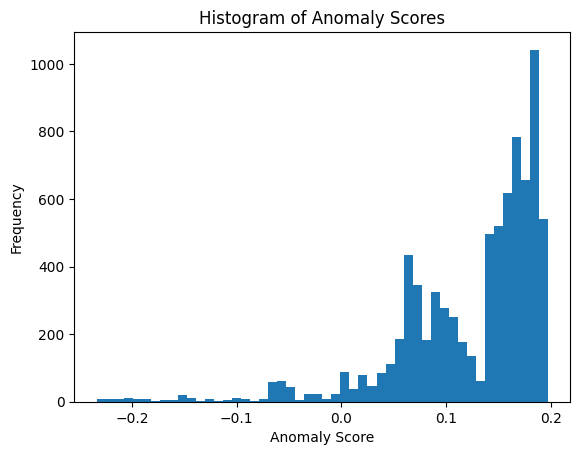

In [ ]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(n_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()
